In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
dt.shape   # show no.of column and rows

(7043, 21)

In [4]:
dt.isna().sum()   # no miising data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Observation
# 1. Columns value is object so need to convert in number
# TotalCharges column is float column but showing Object.

In [7]:
dt['TotalCharges'].nunique()

6531

In [3]:
# Checking TotalCharges column for object value
dt.loc[dt['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [4]:
# Observetion
# TotalCharges= space is present in this column. that is why dtype is object.

In [4]:
dt['TotalCharges']=dt['TotalCharges'].replace(" ",np.NaN) # space is converted into NaN value.

In [5]:
dt.isna().sum() # now NaN value is present in TotalCharges column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
dt['TotalCharges'].dtype


dtype('O')

In [6]:
dt['TotalCharges']=dt['TotalCharges'].astype(float) # string converted into float value

In [7]:
dt['TotalCharges'].dtype

dtype('float64')

In [8]:
#  We fill the NaN value with mean value of the respective column value.
dt['TotalCharges']=dt['TotalCharges'].fillna(dt['TotalCharges'].mean())

In [9]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Observetion
# Now Totalcharges column is float

In [19]:
# Cheking type of data of each column & vizualization in graph


In [20]:
# customerID- This nominal data


Male      3555
Female    3488
Name: gender, dtype: int64


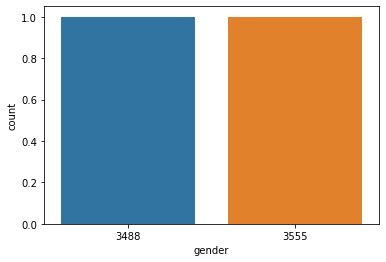

In [21]:
print(dt['gender'].value_counts())
ax=sns.countplot(dt['gender'].value_counts())

In [ ]:
# Observation
# Male is 3555 & Female-3488
# Male & female is almost same taking service in this dataset

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


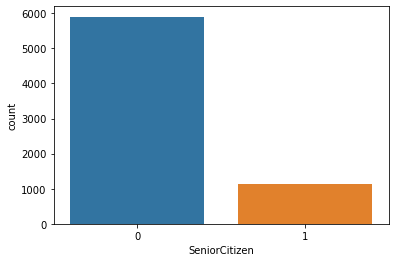

In [22]:
print(dt['SeniorCitizen'].value_counts())
ax=sns.countplot(x='SeniorCitizen',data=dt)

In [ ]:
# Observation
# 0=no seniorCitizen, 1=seniorCitizen
# no SeniorCitizen are taking service more 5901 nos 
# seniorcitizen are taking only 1142 nos out of total number of people.

No     3641
Yes    3402
Name: Partner, dtype: int64


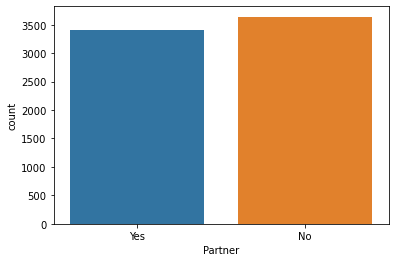

In [23]:
print(dt['Partner'].value_counts())
ax=sns.countplot(x='Partner',data=dt)

In [ ]:
# Observation
# patner is 3641 & Female-3402
# Patner & single is almost same taking service in this dataset

No     4933
Yes    2110
Name: Dependents, dtype: int64


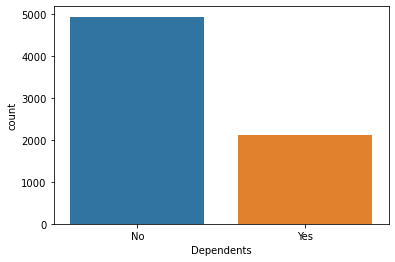

In [24]:
print(dt['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=dt)

In [ ]:
# Observation
# Dependent=2110 nos
# Independent=4933
# independent people are taking service more. Who are depend on some person, ther are not taking service more only 2110 nos out of total dataset.


0      11
36     50
44     51
39     56
28     57
     ... 
4     176
3     200
2     238
72    362
1     613
Name: tenure, Length: 73, dtype: int64


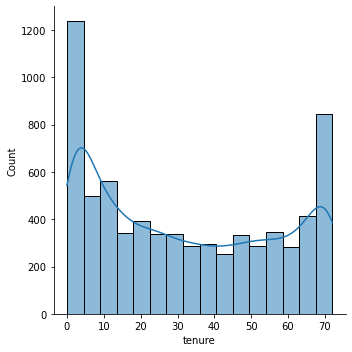

In [25]:
print(dt['tenure'].value_counts(ascending=True))
ax=sns.displot(dt['tenure'],kde=True)

In [ ]:
# observation
# in 0 to 10 days duration-people take srvise more on an average 550 nos people. but after 1o upto 65 days duration, service taken by people averge 300 to 400.
# 

Yes    6361
No      682
Name: PhoneService, dtype: int64


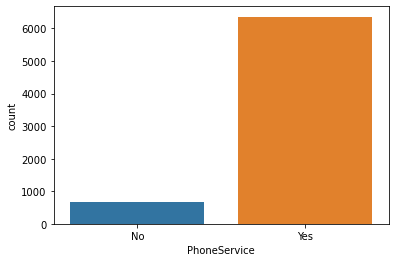

In [26]:
print(dt['PhoneService'].value_counts())
ax=sns.countplot(x='PhoneService',data=dt)

In [ ]:
# observation
# phonesrvice=6361 nos
# no phoneservice-682 nos
# only 682 nos people does not have any phone services and 6361 nos people has phone services.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


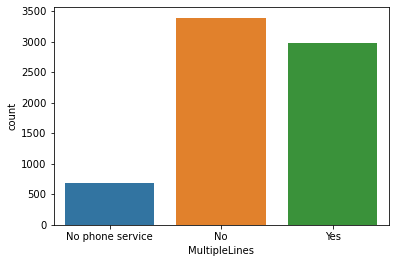

In [27]:
print(dt['MultipleLines'].value_counts())
ax=sns.countplot(x='MultipleLines',data=dt)

In [ ]:
# observation
# there are on taken services those are no phone services (682 nos)
# Only 2971 nos people has taken services out of total no of phone services people.
# 3390 people not taken services.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


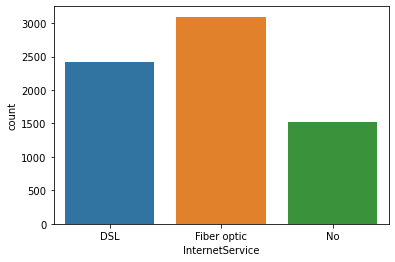

In [28]:
print(dt['InternetService'].value_counts())
ax=sns.countplot(x='InternetService',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# Fiber optic srevices taken 3096 people & DSL service taken 2421 nos people.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


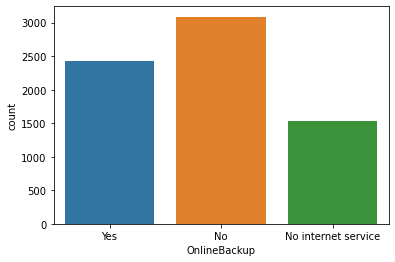

In [29]:
print(dt['OnlineBackup'].value_counts())
ax=sns.countplot(x='OnlineBackup',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# only 2429 nos people taken online backup out of total internet services taken people.
# 3088 no people has not taken onliebackup.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


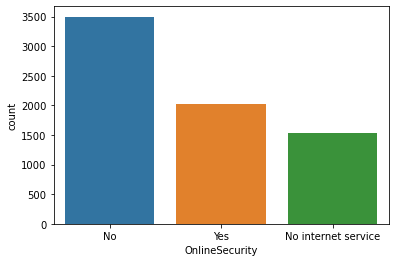

In [30]:
print(dt['OnlineSecurity'].value_counts())
ax=sns.countplot(x='OnlineSecurity',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# only 2019 nos people taken online Security out of total internet services taken people.
# 3498 no people has not taken online security. more than taken interner services are not taken online security.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


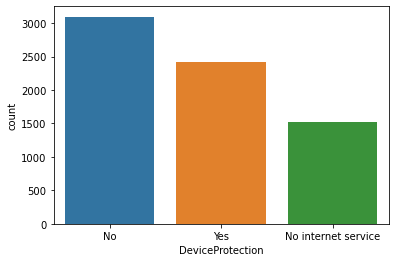

In [31]:
print(dt['DeviceProtection'].value_counts())
ax=sns.countplot(x='DeviceProtection',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# only 2422 nos people taken divice Protection out of total internet services taken people.
# 3095 no people has not taken divice Protection. more than taken interner services are not taken online security.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


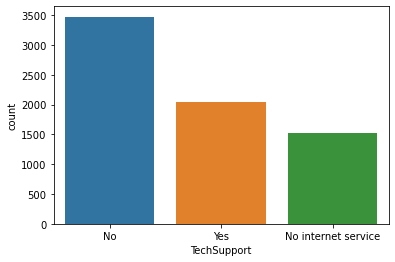

In [32]:
print(dt['TechSupport'].value_counts())
ax=sns.countplot(x='TechSupport',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# only 2044 nos people taken Tech Suport out of total internet services taken people.
# 3473 no people has not taken Tech Suport. more than taken interner services are not taken online security.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


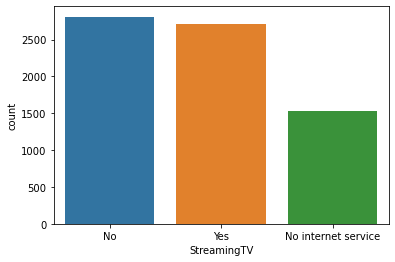

In [33]:
print(dt['StreamingTV'].value_counts())
ax=sns.countplot(x='StreamingTV',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# only 2707 nos people taken streaming TV out of total internet services taken people.
# 2810 no people has not taken streamingTV. more than taken interner services are not taken online security.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


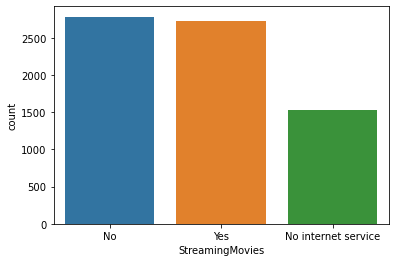

In [34]:
print(dt['StreamingMovies'].value_counts())
ax=sns.countplot(x='StreamingMovies',data=dt)

In [ ]:
# observetion
# 1526 people has no internet services.
# only 2732 nos people taken streaming Movies out of total internet services taken people.
# 2785 no people has not taken streamingMovies. more than taken interner services are not taken online security.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


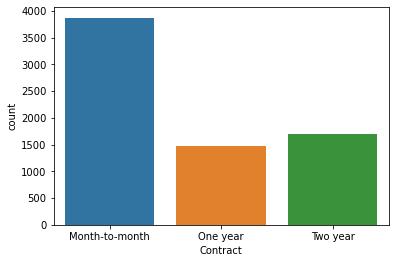

In [35]:
print(dt['Contract'].value_counts())
ax=sns.countplot(x='Contract',data=dt)

In [ ]:
# observetion
# 3875 people are taking service in moth to month services.
# only 1473 nos people taken one yera plan services.
# 1695 no people taken two year services plan.
# People are taking services more in Moth to Month servces plan.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


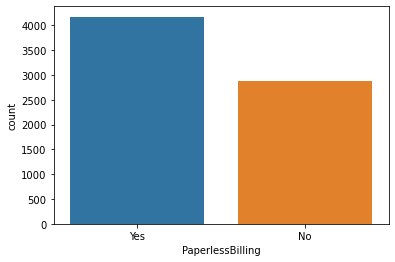

In [36]:
print(dt['PaperlessBilling'].value_counts())
ax=sns.countplot(x='PaperlessBilling',data=dt)

In [ ]:
# Observetion
# 4171 nos people are taking services through paperless billing system
# 2872 nos people are taking services through paper billing system.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


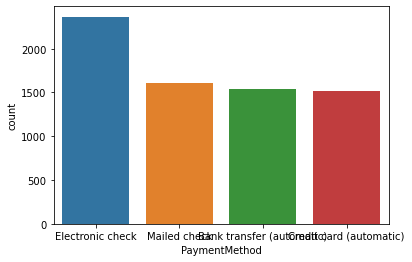

In [37]:
print(dt['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=dt)

In [ ]:
# Observation
# Electonic check payment method is used more people 2365 nos to payment charges.
# Mailed check , Bank transfer (automatic) & Credit card (automatic) payment method is using for payment on an average same people.



78.70     1
87.00     1
87.35     1
63.40     1
43.35     1
         ..
19.70    43
19.90    44
19.95    44
19.85    45
20.05    61
Name: MonthlyCharges, Length: 1585, dtype: int64


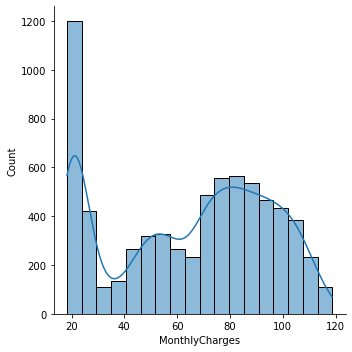

In [38]:
print(dt['MonthlyCharges'].value_counts(ascending=True))
ax=sns.displot(x='MonthlyCharges',data=dt,kde=True)

29.850000       1
59.550000       1
300.700000      1
4234.150000     1
6496.150000     1
               ..
20.050000       8
19.900000       8
19.750000       9
20.200000      11
2283.300441    11
Name: TotalCharges, Length: 6531, dtype: int64


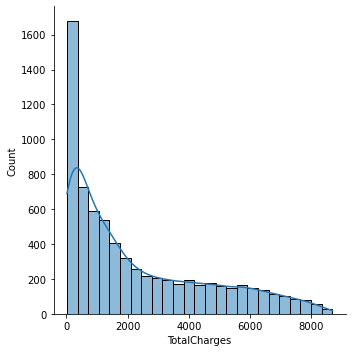

In [39]:
print(dt['TotalCharges'].value_counts(ascending=True))
ax=sns.displot(x='TotalCharges',data=dt,kde=True)

No     5174
Yes    1869
Name: Churn, dtype: int64


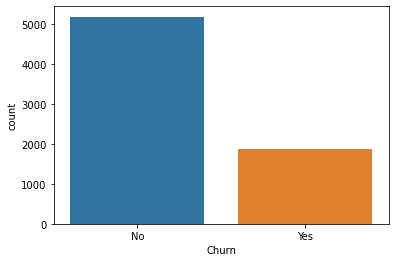

In [40]:
print(dt['Churn'].value_counts())
ax=sns.countplot(x='Churn',data=dt)

In [10]:
# using orinal encoder encoder for converting object to number.
from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()

In [11]:
for i in dt.columns:
    if dt[i].dtypes=='object':
        dt[i]=en.fit_transform(dt[i].values.reshape(-1,1))
        

In [12]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [44]:
# basic information of dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


In [45]:
# data describe for observation only for continious data
dt.describe()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [46]:
# Observation
# 1. MonthlyCharges-Mean & std is not good. data is normal distribution.

#     Continious data
#     Mean-64.76
#     std-30
#     min-18.25
#     Max-118
    
# 2. TotalCharges- Mean & std is not good. data is not normal distributed. Skewness is pressent.
#     Continious data
#     Mean-2283.30
#     std-2265
#     min-18.8
#     Max-8684.80

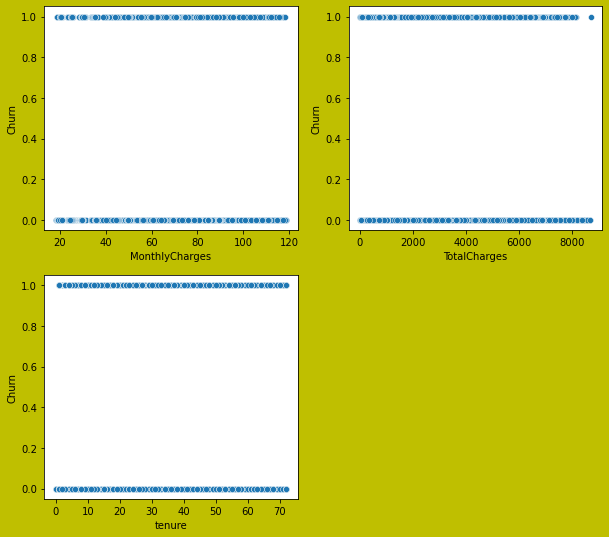

In [47]:
# Cheking normal distribution of data in continious data

plt.figure(figsize=(10,14),facecolor='y')
plotnumber=1
for i in dt[['MonthlyCharges','TotalCharges','tenure']]:
    
    if plotnumber<=3:
        ax=plt.subplot(3,2,plotnumber)
        sns.scatterplot(dt[i],dt['Churn'])
                   
        plt.xlabel(i)
                          
    plotnumber+=1

plt.show()


In [48]:
# # cheking & confirm data is normal distributed
# plt.figure(figsize=(10,12),facecolor='y')
# plotnumber=1
# for i in dt:
#     if plotnumber<=22:
#         ax=plt.subplot(4,6,plotnumber)
#         sns.distplot(dt[i])
#         plt.xlabel(i,fontsize=10)
        
#     plotnumber+=1
    
# plt.show()

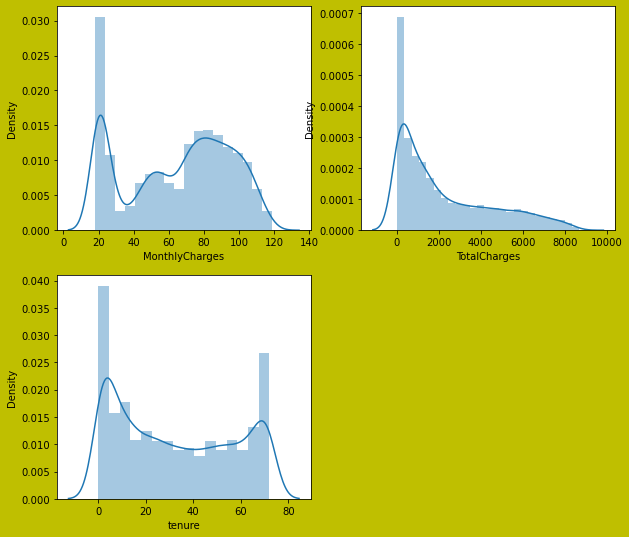

In [49]:
# Cheking normal distribution of data in continious data

plt.figure(figsize=(10,14),facecolor='y')
plotnumber=1
for col in dt[['MonthlyCharges','TotalCharges','tenure']]:
    
    if plotnumber<=3:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(dt[col])
                   
        plt.xlabel(col)
                          
    plotnumber+=1

plt.show()

In [50]:
dt.corr().abs()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,0.002074,0.026729,0.012823,0.008035,0.006483,0.004316,0.012407,0.013292,...,0.006918,0.001140,0.007777,0.016746,0.015028,0.001945,0.011604,0.003916,0.000270,0.017447
gender,0.006288,1.000000,0.001874,0.001808,0.010517,0.005106,0.006488,0.006739,0.000863,0.015017,...,0.000549,0.006825,0.006421,0.008743,0.000126,0.011754,0.017352,0.014569,0.000048,0.008612
SeniorCitizen,0.002074,0.001874,1.000000,0.016479,0.211185,0.016567,0.008576,0.146185,0.032310,0.128221,...,0.021398,0.151268,0.030776,0.047266,0.142554,0.156530,0.038551,0.220173,0.102395,0.150889
Partner,0.026729,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,0.014877,0.154798,0.096848,0.318812,0.150448
Dependents,0.012823,0.010517,0.211185,0.452676,1.000000,0.159712,0.001762,0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,0.111377,0.040292,0.113890,0.064535,0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,0.370436,0.247900,0.824757,0.352229
PhoneService,0.006483,0.006488,0.008576,0.017706,0.001762,0.008448,1.000000,0.020538,0.387436,0.015198,...,0.003727,0.019158,0.055353,0.043870,0.002247,0.016505,0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,0.006739,0.146185,0.142410,0.024991,0.343032,0.020538,1.000000,0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,0.176793,0.433576,0.452883,0.038037
InternetService,0.012407,0.000863,0.032310,0.000891,0.044590,0.030359,0.387436,0.109216,1.000000,0.028416,...,0.044944,0.026047,0.107417,0.098350,0.099721,0.138625,0.086140,0.323260,0.175429,0.047291
OnlineSecurity,0.013292,0.015017,0.128221,0.150828,0.152166,0.325468,0.015198,0.007141,0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,0.157641,0.096726,0.053878,0.254308,0.289309


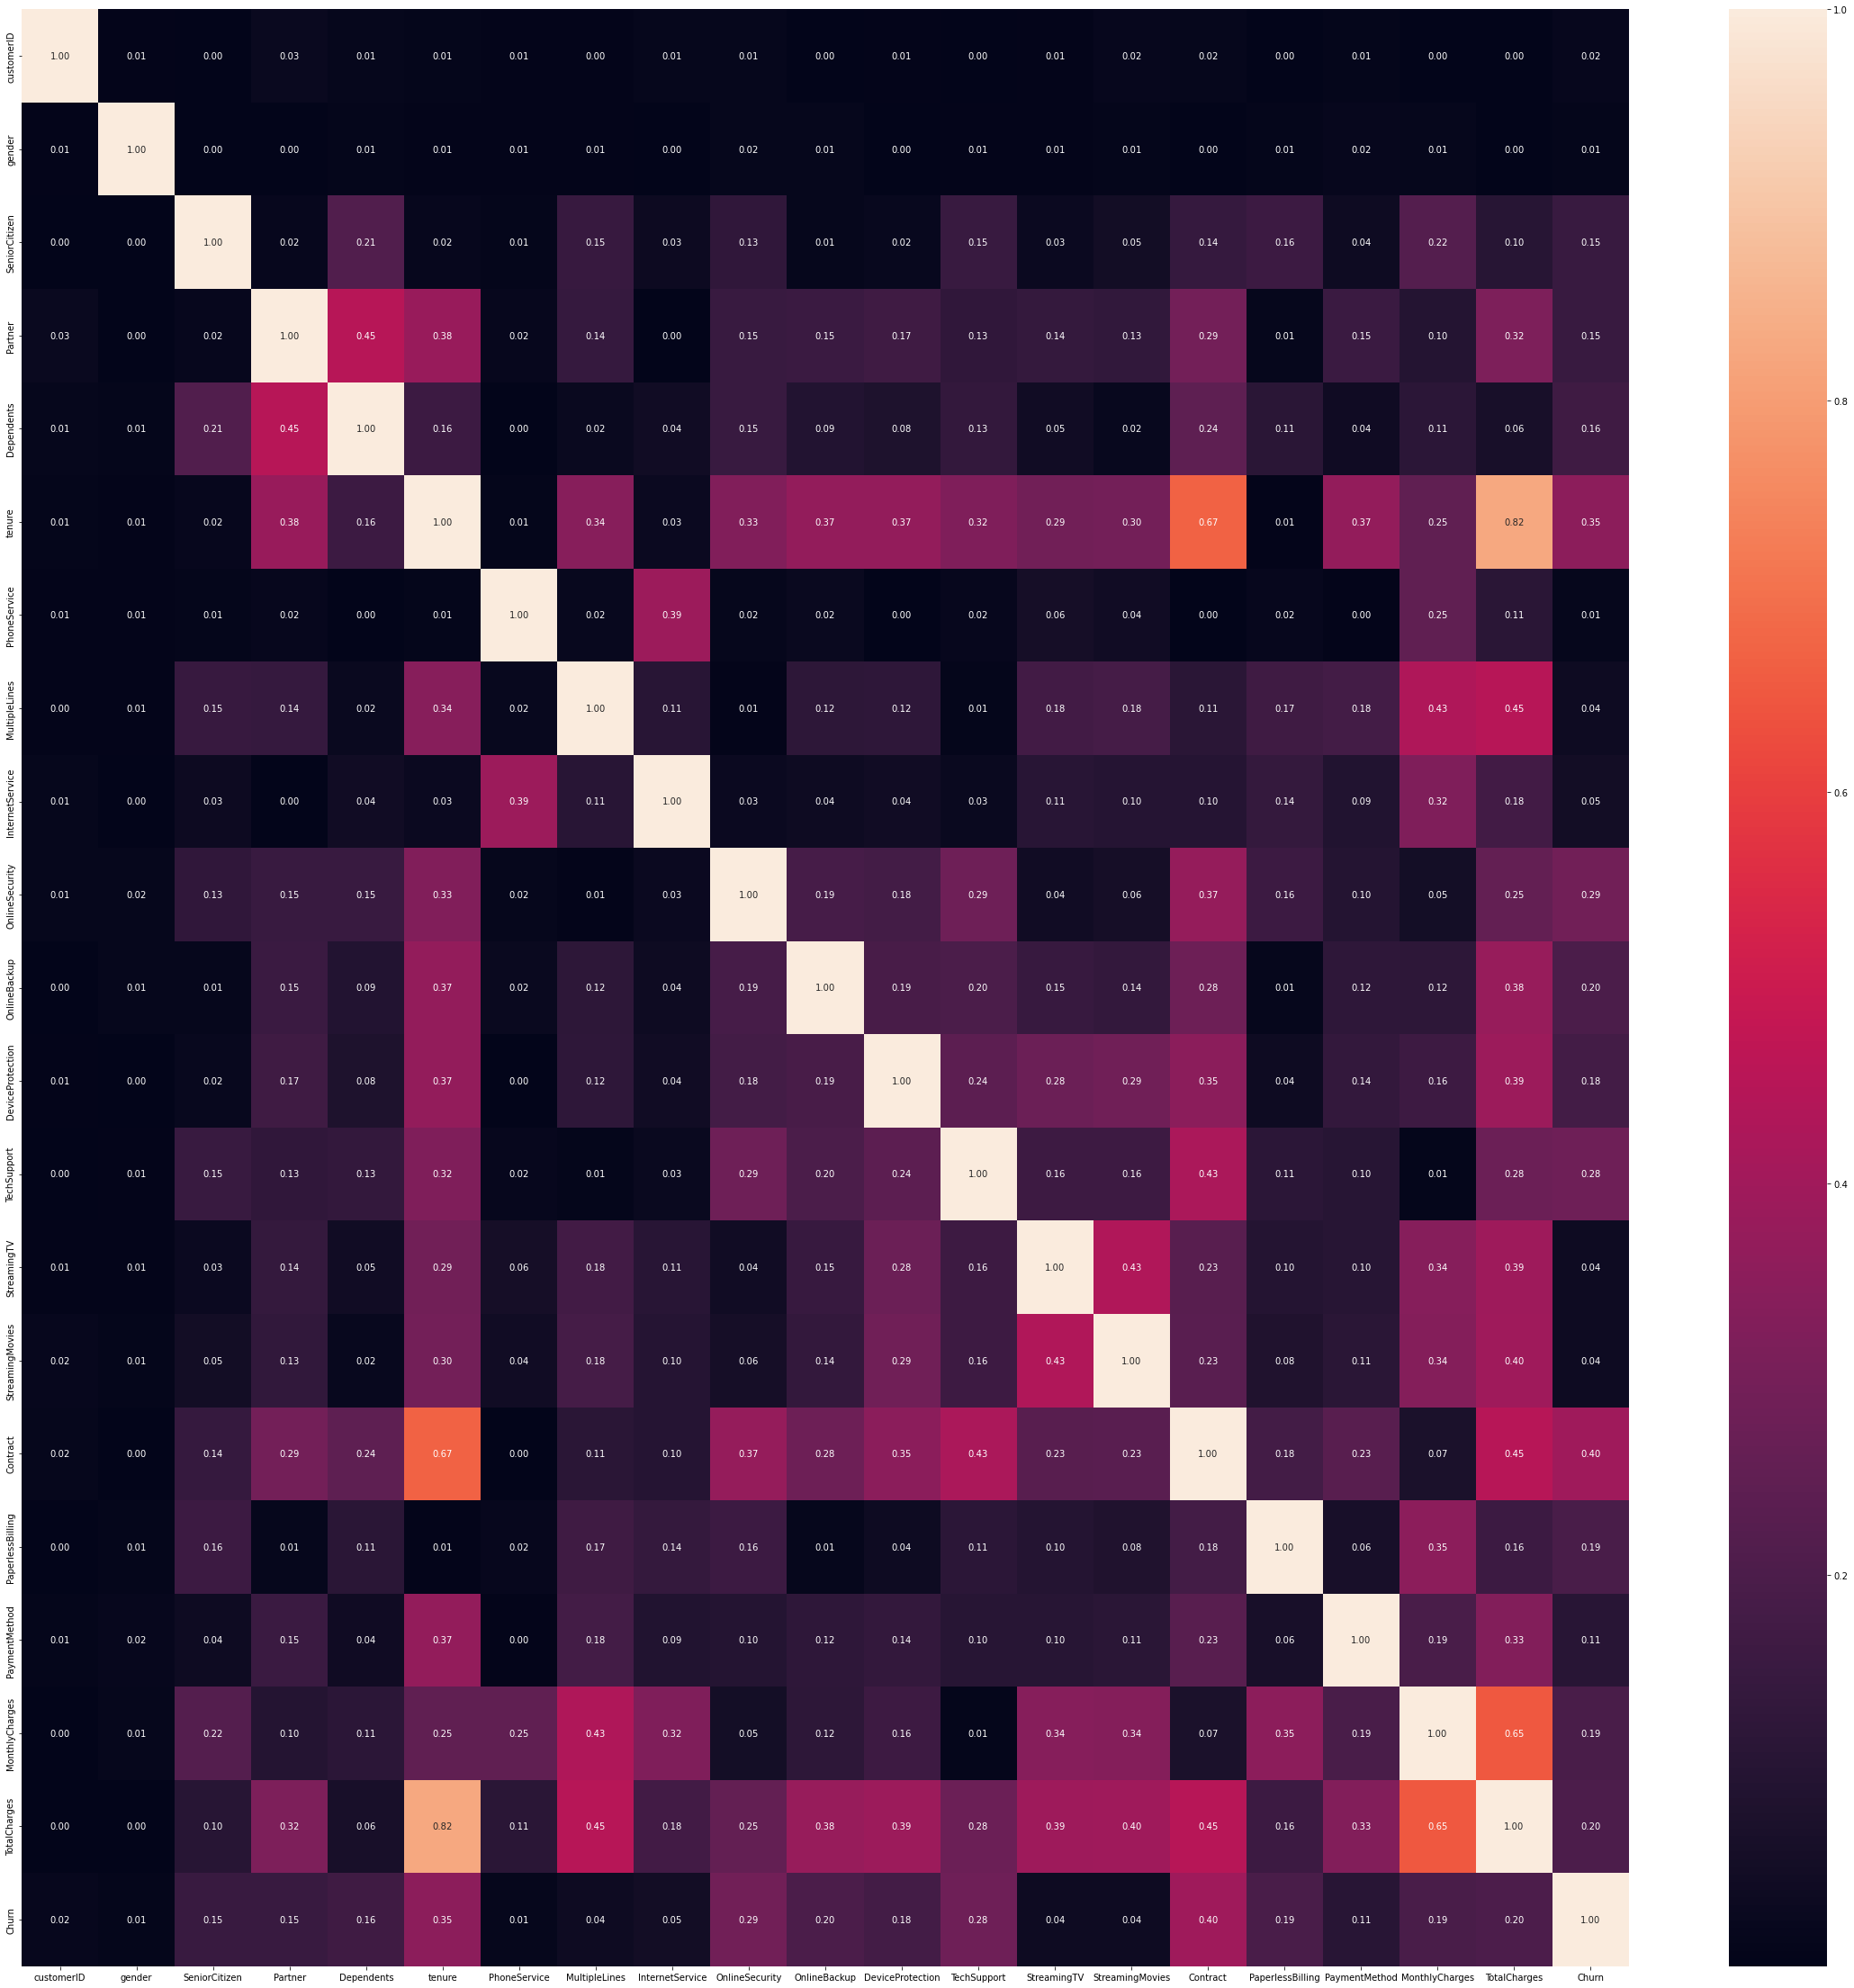

In [51]:
plt.figure(figsize=(40,40))
ax=sns.heatmap(dt.corr().abs(),annot=True,fmt='0.2f')
plt.savefig('heatmap_Customer_churn.jpg')

plt.show()
                                                            

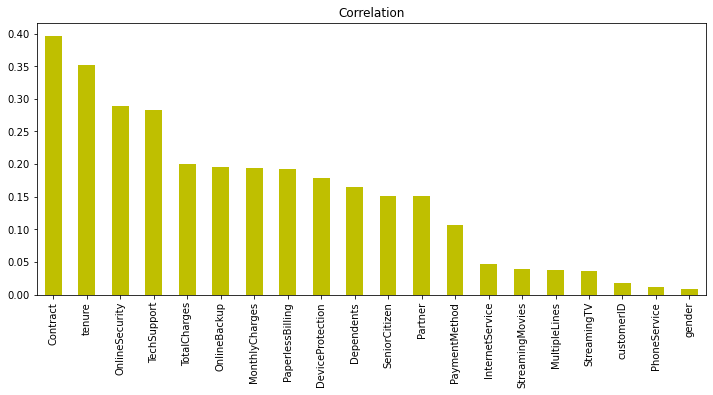

In [52]:
plt.figure(figsize=(12,5))
dt.corr().abs()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='y')
plt.title('Correlation')
plt.show()

In [53]:
# #Cheking corelation with tergate value
# plt.figure(figsize=(10,12),facecolor='y')
# plotnumber=1
# for i in dt:
#     if plotnumber<=22:
#         ax=plt.subplot(4,6,plotnumber)
#         sns.scatterplot(dt[i],dt['Churn'])
#         plt.xlabel(i,fontsize=10)
#         plt.ylabel('Churn')
#     plotnumber+=1
    
# plt.show()

In [13]:
dt.drop(['customerID'],axis=1,inplace=True)

In [14]:
dt.drop_duplicates(inplace=True)
dt.shape

(7021, 20)

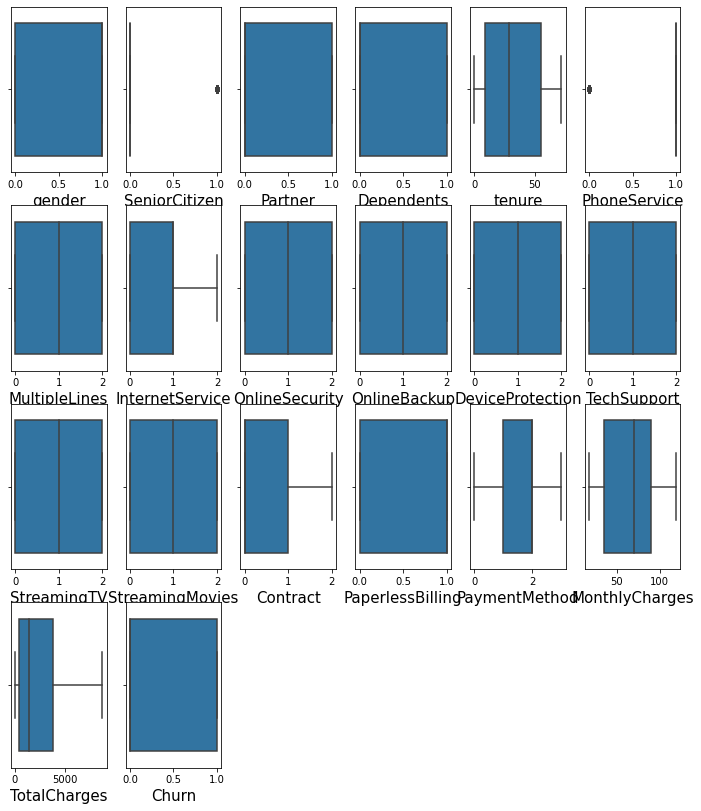

In [56]:
# cheking Outlier using box plot.
plt.figure(figsize=(12,14))
plotnumber=1
for column in dt:
    if plotnumber<=22:
        ax=plt.subplot(4,6,plotnumber)
        sns.boxplot(dt[column],orient='Har')
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

In [57]:
# Observation:
# No outlier is present

In [15]:
x=dt.drop(['Churn'],axis=1)
y=dt.Churn

In [15]:
# Cheking Skewness in data set
x.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

In [60]:
# Observation
# Skewness threshold +->0.5.
# SeniorCitizen,Dependents,PhoneService & Contract- here skewness is presnt but these are catagorical data. so no need to handle Skewness.
# TotalCharges- This is continious data. here skewness is present. but no need handle it bcz very low skewness.

In [16]:
from sklearn.preprocessing import StandardScaler
Stnd=StandardScaler()
x_sclr=Stnd.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_sclr,y,random_state=88,test_size=0.25)



In [57]:
def matric_score(lr,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=lr.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=lr.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
       
        
              
              

### LogisticRegression Model

In [58]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
matric_score(lr,x_train,x_test,y_train,y_test,train=True)
matric_score(lr,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.63%

==========Test Result==========

Accuracy Score : 80.01%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1276
         1.0       0.67      0.54      0.59       480

    accuracy                           0.80      1756
   macro avg       0.75      0.72      0.73      1756
weighted avg       0.79      0.80      0.79      1756



In [60]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(lr,x_sclr,y,cv=9).mean()*100)

80

In [61]:
# Observation
# Model is not overfiting. Test result & cross val Score is almost same.

In [62]:
# we want to imporove result by using hyperparameter tune
param={'max_iter': [10,15,20],
      'n_jobs':[2,3,5,9,10]}

In [63]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(lr,param_grid=param)
grid.fit(x_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [10, 15, 20], 'n_jobs': [2, 3, 5, 9, 10]})

In [71]:
grid.best_params_

{'max_iter': 15, 'n_jobs': 2}

In [72]:
lr=LogisticRegression(max_iter= 15, n_jobs= 2)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=15, n_jobs=2)

In [73]:
matric_score(lr,x_train,x_test,y_train,y_test,train=True)
matric_score(lr,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.66%

==========Test Result==========

Accuracy Score : 80.01%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1276
         1.0       0.67      0.54      0.59       480

    accuracy                           0.80      1756
   macro avg       0.75      0.72      0.73      1756
weighted avg       0.79      0.80      0.79      1756



In [27]:
# Upsample for handle the imbalance data.
from imblearn.over_sampling import SMOTE
up_samp=SMOTE(0.75)
x_train_ns,y_train_ns=up_samp.fit_resample(x_train,y_train)


In [76]:
y_train_ns.value_counts()

0.0    3888
1.0    2916
Name: Churn, dtype: int64

In [81]:
y_train.value_counts()

0.0    3888
1.0    1377
Name: Churn, dtype: int64

In [28]:
x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_sclr,y,random_state=88,test_size=0.25)


In [78]:
def matric_score(lr,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=lr.predict(x_train_ns)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=lr.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
       
        
              

In [79]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)

LogisticRegression()

In [80]:
matric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(lr,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.63%

==========Test Result==========

Accuracy Score : 80.01%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1276
         1.0       0.67      0.54      0.59       480

    accuracy                           0.80      1756
   macro avg       0.75      0.72      0.73      1756
weighted avg       0.79      0.80      0.79      1756



### Knn Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [69]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=knn.predict(x_train_ns)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=knn.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
       

In [70]:
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier()

In [71]:
matric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 85.14%

==========Test Result==========

Accuracy Score : 69.82%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.72      0.78      1276
         1.0       0.46      0.65      0.54       480

    accuracy                           0.70      1756
   macro avg       0.65      0.68      0.66      1756
weighted avg       0.74      0.70      0.71      1756



In [38]:
# cross val score for cheking overfitting model
cross_val_score(knn,x_sclr,y,cv=9).mean()*100

76.04698014101156

In [101]:
# Use hyperparameter for increase result
pram={'n_neighbors':[2,3,4,5,6,7,8,9,10],
     'algorithm':['kd_tree', 'brute'],
     'leaf_size':range(10,30),
     }

In [102]:
grid=GridSearchCV(knn,param_grid=pram)
grid.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(10, 30),
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [103]:
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 17, 'n_neighbors': 10}

In [104]:
knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 17, n_neighbors = 10)

In [105]:
knn.fit(x_train_ns,y_train_ns)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=17, n_neighbors=10)

In [39]:
matric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 83.07%

==========Test Result==========

Accuracy Score : 74.84%
classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1296
         1.0       0.52      0.50      0.51       465

    accuracy                           0.75      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.75      0.75      0.75      1761



###   RandomForest Model

In [73]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [74]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ran.predict(x_train_ns)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ran.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [75]:
ran.fit(x_train_ns,y_train_ns)

RandomForestClassifier()

In [76]:
matric_score(ran,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(ran,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 99.79%

==========Test Result==========

Accuracy Score : 77.90%
classification report 
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1276
         1.0       0.61      0.55      0.57       480

    accuracy                           0.78      1756
   macro avg       0.72      0.71      0.71      1756
weighted avg       0.77      0.78      0.78      1756



In [40]:
# cross val score for cheking overfitting model
cross_val_score(ran,x_sclr,y,cv=9).mean()*100

79.39831827005888

In [41]:
# Use hyperparameter for increase result
pram={'n_estimators':[2,3,4,5,6,7,8,9,10],
      'criterion':['gini', 'entropy'],
      'max_depth':range(10,30),
      'min_samples_split':range(5,20),
      'min_samples_leaf':range(5,15)}
       

In [49]:
grid=GridSearchCV(ran,param_grid=pram)
grid.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 30),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': range(5, 20),
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [50]:
grid.best_params_ 

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 7,
 'min_samples_split': 9,
 'n_estimators': 8}

In [51]:
ran=RandomForestClassifier(criterion = 'entropy',
 max_depth = 11,
 min_samples_leaf = 7,
 min_samples_split = 9,
 n_estimators = 8)

In [52]:
ran.fit(x_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=7,
                       min_samples_split=9, n_estimators=8)

In [53]:
matric_score(ran,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(ran,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 83.07%

==========Test Result==========

Accuracy Score : 74.84%
classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1296
         1.0       0.52      0.50      0.51       465

    accuracy                           0.75      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.75      0.75      0.75      1761



### Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dec_tree=DecisionTreeClassifier()

In [24]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=dec_tree.predict(x_train_ns)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=dec_tree.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [58]:
dec_tree.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier()

In [59]:
matric_score(dec_tree,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(dec_tree,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 100.00%

==========Test Result==========

Accuracy Score : 70.47%
classification report 
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      1296
         1.0       0.44      0.47      0.46       465

    accuracy                           0.70      1761
   macro avg       0.63      0.63      0.63      1761
weighted avg       0.71      0.70      0.71      1761



In [60]:
# Train result is 100% and test result is 70.47%. model only learn the data 70.47% out of 100 %.
# it may overfitting model.

In [63]:
# cheking overfitting the model
cross_val_score(dec_tree,x_sclr,y,cv=9).mean()*100


72.38374276913831

In [64]:
# Observation
# cross val score is 72 % & accuacy score of test data is 71 %. both result almost same so model is not overfitting 

In [20]:
from sklearn.model_selection import GridSearchCV

In [25]:
#  Increase result using hyperperameter tuning technique

pram={'criterion':['gini', 'entropy'],
      'max_depth':range(10,20),
      'min_samples_split':range(5,10),
      'min_samples_leaf':range(5,12)}

In [28]:
grid=GridSearchCV(dec_tree,param_grid=pram)
grid.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'min_samples_leaf': range(5, 12),
                         'min_samples_split': range(5, 10)})

In [29]:
grid.best_params_ 

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

In [31]:
dec_tree=DecisionTreeClassifier(criterion = 'gini',
 max_depth = 10,
 min_samples_leaf = 6,
 min_samples_split = 5)

In [32]:
dec_tree.fit(x_train_ns,y_train_ns)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6, min_samples_split=5)

In [33]:
matric_score(dec_tree,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(dec_tree,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 85.21%

==========Test Result==========

Accuracy Score : 77.68%
classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      1276
         1.0       0.59      0.61      0.60       480

    accuracy                           0.78      1756
   macro avg       0.72      0.73      0.72      1756
weighted avg       0.78      0.78      0.78      1756



In [34]:
# Now result is increase to 78%

### Adoboost Model

In [35]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [36]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ada.predict(x_train_ns)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ada.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [37]:
ada.fit(x_train_ns,y_train_ns)

AdaBoostClassifier()

In [39]:
matric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.91%

==========Test Result==========

Accuracy Score : 79.04%
classification report 
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1276
         1.0       0.60      0.70      0.64       480

    accuracy                           0.79      1756
   macro avg       0.74      0.76      0.75      1756
weighted avg       0.80      0.79      0.79      1756



In [40]:
# Train & test Result is good.Almost same

In [43]:
# cheking cross val score
cross_val_score(ada,x_sclr,y,cv=9).mean()*100

80.38729658447967

In [44]:
# Model is not over fitting.& result is good of train & test result

In [49]:
# using hyperparameter tuning technique to increase the accuracy score
param={'n_estimators' : range(5,20),
       'learning_rate' : [0.01,0.10,1.0,0.05]
       }

In [50]:
grid=GridSearchCV(ada,param_grid=param)
grid.fit(x_train_ns,y_train_ns)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 0.05],
                         'n_estimators': range(5, 20)})

In [51]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 18}

In [52]:
ada=AdaBoostClassifier(learning_rate = 1.0, n_estimators = 18)

In [53]:
ada.fit(x_train_ns,y_train_ns)

AdaBoostClassifier(n_estimators=18)

In [54]:
def matric_score(calssi,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ada.predict(x_train_ns)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train_ns,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ada.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))

In [55]:
matric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
matric_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)


==========Train Result==========

Accuracy Score : 79.26%

==========Test Result==========

Accuracy Score : 77.22%
classification report 
               precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      1276
         1.0       0.57      0.71      0.63       480

    accuracy                           0.77      1756
   macro avg       0.72      0.75      0.73      1756
weighted avg       0.79      0.77      0.78      1756



In [56]:
# accuracy score is not increase but its moel is good

In [65]:
# Roc AUC Curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

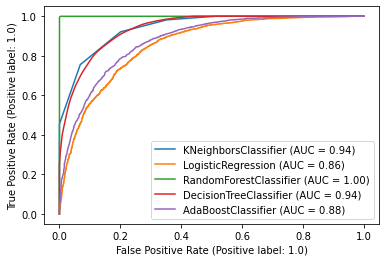

In [78]:
# Graph of AUC for Test Data
disp=plot_roc_curve(knn,x_train_ns,y_train_ns)
plot_roc_curve(lr,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ran,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(dec_tree,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

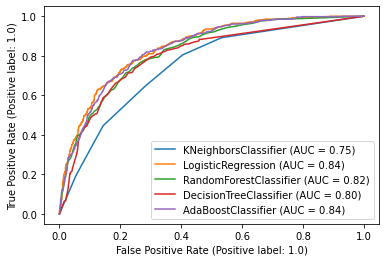

In [77]:
# Graph of AUC for Test Data
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dec_tree,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [79]:
import pickle

In [80]:
pickle.dump('lr',open('LogisticRegresion_model','wb'))

### Save Logistic regresion model. AUC curve, Train & test accuracy score is close to same. Thus LogisticsRegresion model is performing better than other model